## TASK: MOVIE GENRE CLASSIFICATION

DOMAIN : MACHINE LEARNING

# Importing the Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

# Data Collection and Processing

In [8]:
# Creating a DataFrame 
data = pd.read_csv('train_data.txt', sep=':::',header=None,engine="python",index_col=0,names=["name","genre","text"])

In [9]:
# print first five rows of the DataFrame
data.head()

,name,genre,text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [10]:
# print the number of rows and columns
data.shape

(54214, 3)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    54214 non-null  object
 1   genre   54214 non-null  object
 2   text    54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [12]:
# checking the null valuesd
data.isnull().sum()

name     0
genre    0
text     0
dtype: int64

In [13]:
data["genre"].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [14]:
d=dict(data["genre"].value_counts())
d

{' drama ': 13613,
 ' documentary ': 13096,
 ' comedy ': 7447,
 ' short ': 5073,
 ' horror ': 2204,
 ' thriller ': 1591,
 ' action ': 1315,
 ' western ': 1032,
 ' reality-tv ': 884,
 ' family ': 784,
 ' adventure ': 775,
 ' music ': 731,
 ' romance ': 672,
 ' sci-fi ': 647,
 ' adult ': 590,
 ' crime ': 505,
 ' animation ': 498,
 ' sport ': 432,
 ' talk-show ': 391,
 ' fantasy ': 323,
 ' mystery ': 319,
 ' musical ': 277,
 ' biography ': 265,
 ' history ': 243,
 ' game-show ': 194,
 ' news ': 181,
 ' war ': 132}

In [15]:
x=list(d.keys())
y=list(d.values())

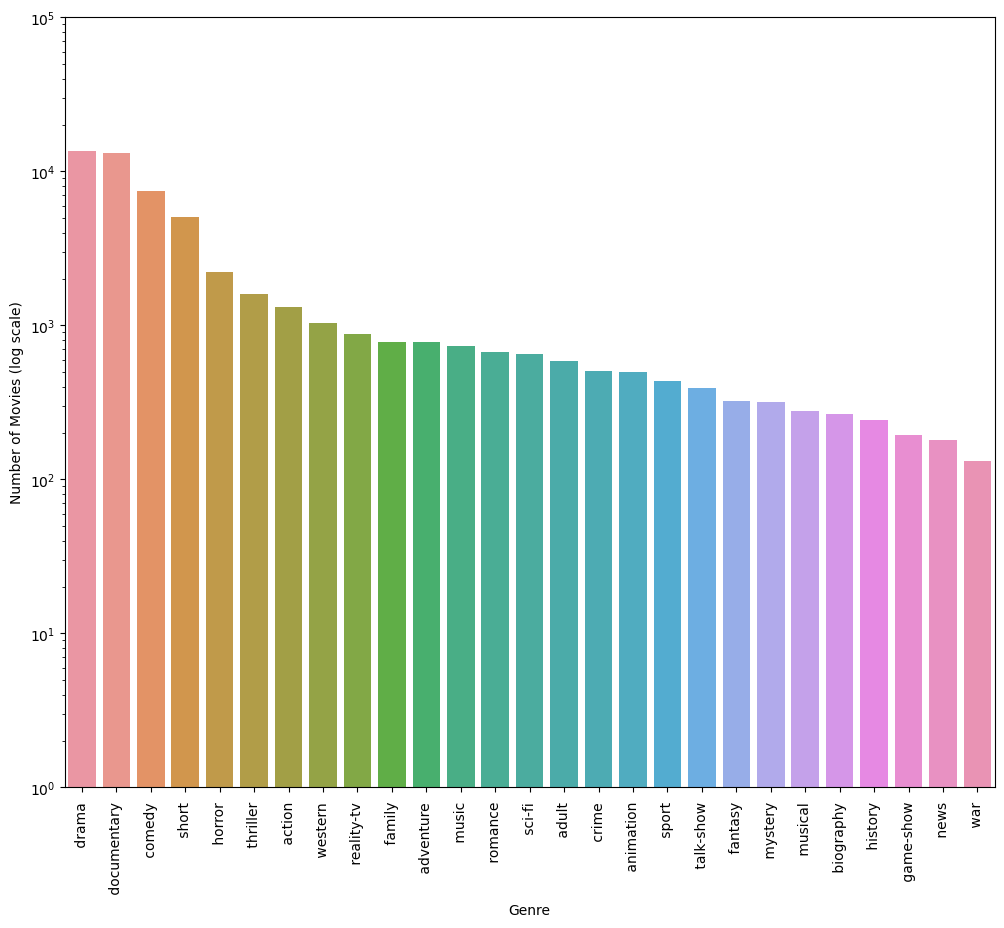

In [16]:
df = pd.DataFrame({'Genre':x, 'Total': y})
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(data=df, x='Genre', y='Total', axes=ax)
ax.set(yscale='log', ylim=(1, 1e5), ylabel='Number of Movies (log scale)')
plt.xticks(rotation=90)
plt.show()

In [17]:
data['genre'] = data['genre'].str.strip()
data['name'] = data['name'].str.strip()
data['text'] = data['text'].str.strip()

# Encoding Categorical Data

In [18]:
encode_genre={'drama':0, 'thriller':1, 'adult':2, 'documentary':3, 'comedy':4, 'crime':5, 'reality-tv':6, 'horror':7,
              'sport':8, 'animation':9,'action':10, 'fantasy':11, 'short':12, 'sci-fi':13, 'music':14,
              'adventure':15, 'talk-show':16, 'western':17, 'family':18, 'mystery':19,'history':20, 'news':21,
              'biography':22,'romance':23, 'game-show':24,'musical':25, 'war':26}

In [19]:
data['genre'] = data['genre'].map(encode_genre)

In [20]:
data.head()

,name,genre,text
1,Oscar et la dame rose (2009),0,Listening in to a conversation between his doc...
2,Cupid (1997),1,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",2,As the bus empties the students for their fiel...
4,The Secret Sin (1915),0,To help their unemployed father make ends meet...
5,The Unrecovered (2007),0,The film's title refers not only to the un-rec...


# Splitting the new data into Features and Target

In [21]:
X=data.drop("genre",axis=1)
Y=data["genre"]

In [22]:
X.head()

,name,text
1,Oscar et la dame rose (2009),Listening in to a conversation between his doc...
2,Cupid (1997),A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fiel...
4,The Secret Sin (1915),To help their unemployed father make ends meet...
5,The Unrecovered (2007),The film's title refers not only to the un-rec...


In [23]:
Y.head()

1    0
2    1
3    2
4    0
5    0
Name: genre, dtype: int64

# Splitting the data into Testing and Traning data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape ,X_test.shape, Y_train.shape,Y_test.shape)

(43371, 2) (10843, 2) (43371,) (10843,)


In [26]:
feature_extraction=TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train["text"])
X_test_features=feature_extraction.transform(X_test["text"])

# convert Y_train and Y_test values as integers

Y_train=Y_train.astype("int")
Y_test=Y_test.astype("int")

# Model Training

In [27]:
model = MultinomialNB()

In [28]:
X_train_features.shape[0]

43371

In [29]:
len(Y_train)

43371

In [30]:
# Train the classifier
model.fit(X_train_features, Y_train)

MultinomialNB()

# Model Evaluation

In [31]:
y_predict = model.predict(X_test_features)
y_predict

array([0, 0, 0, ..., 0, 3, 0])

In [32]:
# Caluculating mean absolute error
error=metrics.mean_absolute_error(Y_test,y_predict)
print("Mean absolute error :",error)

Mean absolute error : 4.460020289587752


In [33]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.38      0.88      0.53      2697
           1       0.00      0.00      0.00       309
           2       0.00      0.00      0.00       112
           3       0.53      0.90      0.67      2659
           4       0.73      0.05      0.09      1443
           5       0.00      0.00      0.00       107
           6       0.00      0.00      0.00       192
           7       0.00      0.00      0.00       431
           8       0.00      0.00      0.00        93
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00       263
          11       0.00      0.00      0.00        74
          12       1.00      0.00      0.00      1045
          13       0.00      0.00      0.00       143
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00       139
          16       0.00      0.00      0.00        81
          17       0.00    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
